In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


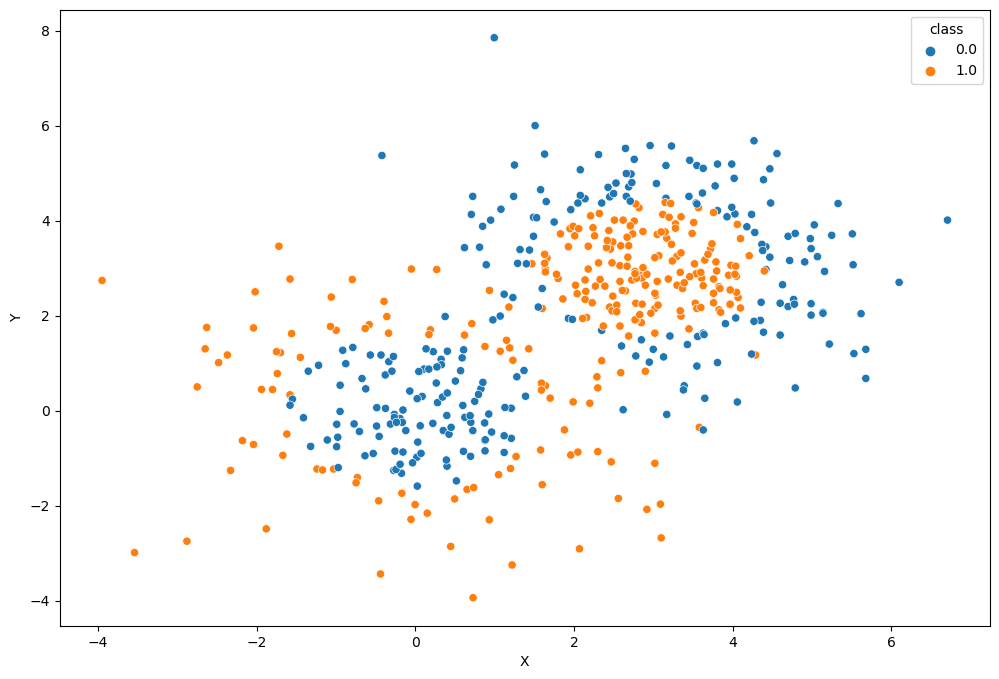

In [3]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [8]:
from sklearn.linear_model import LogisticRegression

### Your code is here
X = circ.drop('class', axis=1)
Y = circ['class']
log_model = LogisticRegression()
log_model.fit(X, Y)
accuracy = np.mean(Y == log_model.predict(X)).round(3)
print("Accuracy:", accuracy)

Accuracy: 0.424


In [14]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.4/1.4 MB 5.4 MB/s eta 0:00:00


<AxesSubplot:>

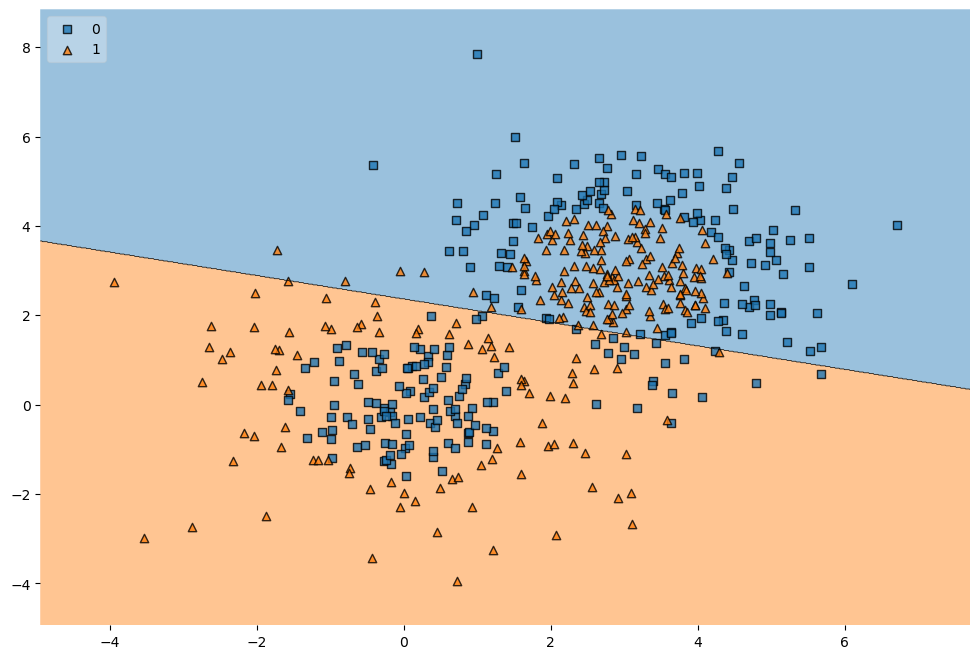

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, Y.values.astype('int'), clf=log_model, legend=2)

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [32]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]
accuracy = []

### Your code is here
for k in all_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy.append(np.mean(y_test == knn.predict(X_test)).round(3))
print(accuracy)

[0.89, 0.87, 0.85, 0.74, 0.75, 0.73]


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [ ]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [ ]:
### Your code is here




1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [35]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [39]:
### Your code is here
neighbours = [1, 5, 10]
accuracy = {}
for k in neighbours:
    pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k))])
    pipe.fit(X_train, y_train)
    accuracy[k] = np.mean(y_test == pipe.predict(X_test)).round(3)
print("Accuracy:", accuracy)

Accuracy: {1: 0.565, 5: 0.63, 10: 0.661}


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [42]:
### Your code is here
new_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=10, p=1))])
pipe.fit(X_train, y_train)
print("Accuracy:", np.mean(y_test == pipe.predict(X_test)).round(3))

Accuracy: 0.661


**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [43]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


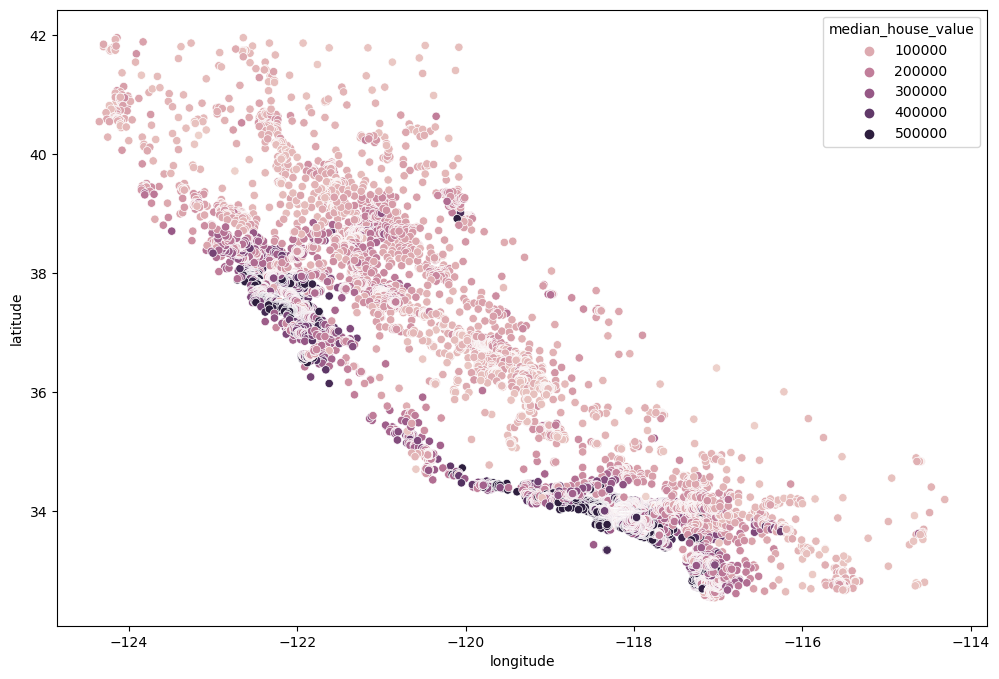

In [71]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

In [48]:
### Your code is here
pipe = Pipeline([('scaler', StandardScaler()), ('linear_model', LinearRegression())])
pipe.fit(X_train, y_train)
print("RMSE on linear regression:", round(((np.mean((y_test - pipe.predict(X_test)) ** 2)) ** 0.5), 3))

RMSE on linear regression: 98369.877


In [78]:
param_grid = {'knn__n_neighbors': np.linspace(1, 10, 10, dtype=int)}

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)

pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
search = GridSearchCV(pipe, param_grid, cv=ps, scoring='neg_root_mean_squared_error')
search.fit(X, y)

print("Best parametrs:", search.best_params_)
print("Best RMSE on KNN:", abs(search.best_score_.round(3)))

Best parametrs: {'knn__n_neighbors': 1}
Best RMSE on KNN: 70159.07


In [107]:
from sklearn.neighbors import KernelDensity
losses = {}
for h in np.arange(0.02, 0.1, 0.01):
    
    def kernel(distances, h=h):
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1 / 2) * ((distances ** 2) / (h ** 2))
        return const * np.exp(power)
    for k in np.linspace(1, 10, 10, dtype=int):
        pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k, weights=kernel))])
        pipe.fit(X_train, y_train)
        losses[round(h, 3)] = round(((np.mean((y_test - pipe.predict(X_test)) ** 2)) ** 0.5), 3)

pd.DataFrame(losses, index=np.linspace(1, 10, 10, dtype=int))

,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1,68161.409,68645.337,68605.905,68552.83,68563.259,68629.953,68572.159,68650.478
2,68161.409,68645.337,68605.905,68552.83,68563.259,68629.953,68572.159,68650.478
3,68161.409,68645.337,68605.905,68552.83,68563.259,68629.953,68572.159,68650.478
4,68161.409,68645.337,68605.905,68552.83,68563.259,68629.953,68572.159,68650.478
5,68161.409,68645.337,68605.905,68552.83,68563.259,68629.953,68572.159,68650.478
6,68161.409,68645.337,68605.905,68552.83,68563.259,68629.953,68572.159,68650.478
7,68161.409,68645.337,68605.905,68552.83,68563.259,68629.953,68572.159,68650.478
8,68161.409,68645.337,68605.905,68552.83,68563.259,68629.953,68572.159,68650.478
9,68161.409,68645.337,68605.905,68552.83,68563.259,68629.953,68572.159,68650.478
10,68161.409,68645.337,68605.905,68552.83,68563.259,68629.953,68572.159,68650.478
